Importing Dependencies


In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
import xgboost
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix
import pickle
%matplotlib inline 


#Loading the Dataset


In [55]:
covid_dataset = pd.read_csv('/content/Covid Dataset.csv')
covid_dataset.head()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,...,Yes,Yes,No,Yes,No,Yes,Yes,No,No,Yes
1,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,...,Yes,No,No,No,Yes,Yes,No,No,No,Yes
2,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,...,Yes,Yes,Yes,No,No,No,No,No,No,Yes
3,Yes,Yes,Yes,No,No,Yes,No,No,Yes,Yes,...,No,No,Yes,No,Yes,Yes,No,No,No,Yes
4,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,...,No,Yes,No,Yes,No,Yes,No,No,No,Yes


#### Basic EDA of the Dataset
Gathering information about the dataset

In [56]:
covid_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5434 entries, 0 to 5433
Data columns (total 21 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Breathing Problem                        5434 non-null   object
 1   Fever                                    5434 non-null   object
 2   Dry Cough                                5434 non-null   object
 3   Sore throat                              5434 non-null   object
 4   Running Nose                             5434 non-null   object
 5   Asthma                                   5434 non-null   object
 6   Chronic Lung Disease                     5434 non-null   object
 7   Headache                                 5434 non-null   object
 8   Heart Disease                            5434 non-null   object
 9   Diabetes                                 5434 non-null   object
 10  Hyper Tension                            5434 non-null   obj

In [57]:
covid_dataset.describe().T

,count,unique,top,freq
Breathing Problem,5434,2,Yes,3620
Fever,5434,2,Yes,4273
Dry Cough,5434,2,Yes,4307
Sore throat,5434,2,Yes,3953
Running Nose,5434,2,Yes,2952
Asthma,5434,2,No,2920
Chronic Lung Disease,5434,2,No,2869
Headache,5434,2,Yes,2736
Heart Disease,5434,2,No,2911
Diabetes,5434,2,No,2846


Observation - Good dataset as their are no NaN values in the dataset. 
But data values are in the form which need to converted to 0 and 1

In [58]:
encoder = LabelEncoder()
covid_dataset = covid_dataset.apply(encoder.fit_transform).astype(int)
covid_dataset.head()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,1,1,1,1,1,0,0,0,0,1,...,1,1,0,1,0,1,1,0,0,1
1,1,1,1,1,0,1,1,1,0,0,...,1,0,0,0,1,1,0,0,0,1
2,1,1,1,1,1,1,1,1,0,1,...,1,1,1,0,0,0,0,0,0,1
3,1,1,1,0,0,1,0,0,1,1,...,0,0,1,0,1,1,0,0,0,1
4,1,1,1,1,1,0,1,1,1,1,...,0,1,0,1,0,1,0,0,0,1


Now data values are all of 'int' Dtype

In [59]:
covid_dataset.corr()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
Breathing Problem,1.000000,0.089903,0.159562,0.303768,0.055190,0.075318,-0.098291,-0.062172,-0.073366,0.055427,...,0.000561,-0.075390,0.117795,0.214634,0.200304,0.066688,0.018295,NaN,NaN,0.443764
Fever,0.089903,1.000000,0.127580,0.322235,0.081758,0.073953,-0.025160,-0.035416,-0.031462,0.050286,...,-0.060458,-0.008067,0.128726,0.164704,0.070490,0.002252,0.012102,NaN,NaN,0.352891
Dry Cough,0.159562,0.127580,1.000000,0.213907,-0.030763,0.086843,-0.043664,-0.035912,0.047566,-0.006593,...,-0.039909,0.008251,0.331418,0.128330,0.117963,0.086176,0.163102,NaN,NaN,0.464292
Sore throat,0.303768,0.322235,0.213907,1.000000,0.039450,0.081377,-0.050440,-0.015971,0.002177,0.001938,...,-0.023290,0.025886,0.205986,0.189251,0.216438,0.079055,0.104378,NaN,NaN,0.502848
Running Nose,0.055190,0.081758,-0.030763,0.039450,1.000000,-0.022763,-0.014376,0.068479,-0.056750,0.042961,...,0.007026,-0.014673,0.034526,0.003776,0.061099,0.032568,-0.061323,NaN,NaN,-0.005657
Asthma,0.075318,0.073953,0.086843,0.081377,-0.022763,1.000000,-0.033771,0.037064,0.076783,-0.012060,...,0.006564,0.101909,0.068286,0.005046,-0.044592,0.020941,-0.115679,NaN,NaN,0.089930
Chronic Lung Disease,-0.098291,-0.025160,-0.043664,-0.050440,-0.014376,-0.033771,1.000000,-0.050480,-0.039860,0.046789,...,-0.047655,-0.050333,-0.088854,-0.062482,-0.020548,-0.093049,0.038343,NaN,NaN,-0.056837
Headache,-0.062172,-0.035416,-0.035912,-0.015971,0.068479,0.037064,-0.050480,1.000000,0.048471,0.032390,...,0.052035,0.097778,0.043589,-0.082101,-0.162992,-0.005790,-0.012625,NaN,NaN,-0.027793
Heart Disease,-0.073366,-0.031462,0.047566,0.002177,-0.056750,0.076783,-0.039860,0.048471,1.000000,-0.032956,...,-0.058925,0.004121,-0.020761,-0.025593,-0.045437,0.086169,0.035000,NaN,NaN,0.027072
Diabetes,0.055427,0.050286,-0.006593,0.001938,0.042961,-0.012060,0.046789,0.032390,-0.032956,1.000000,...,-0.043903,0.040651,0.039013,-0.085696,-0.061650,-0.078212,0.097696,NaN,NaN,0.040627


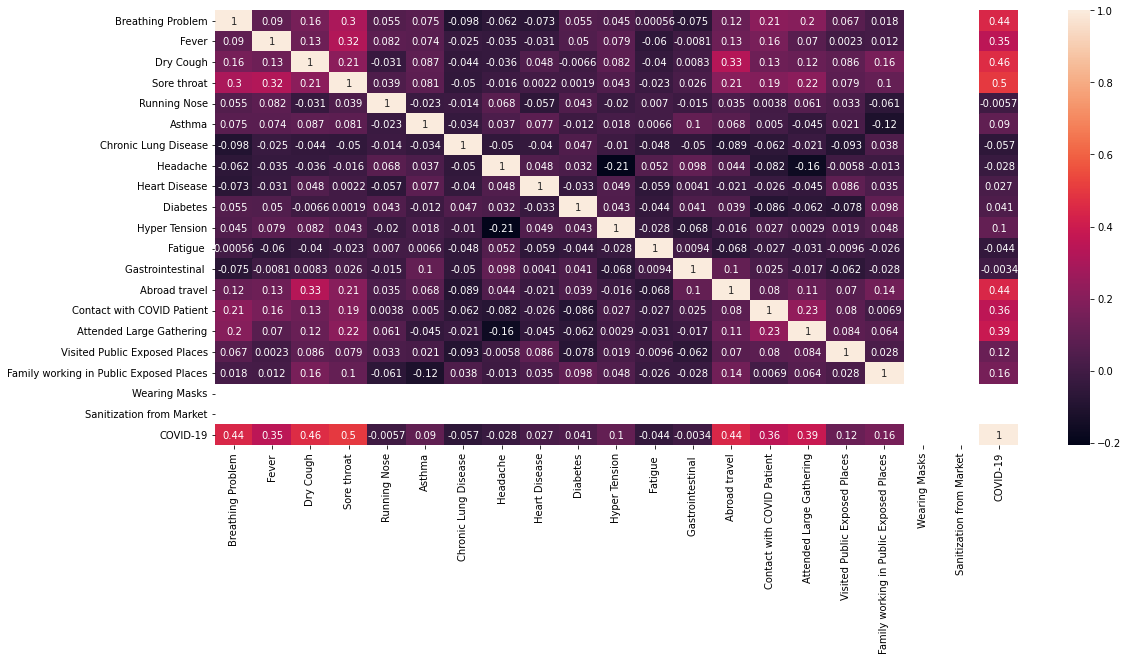

In [60]:
plt.figure(figsize = (18, 8))
sns.heatmap(covid_dataset.corr(), annot = True)

####Data Visualization

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


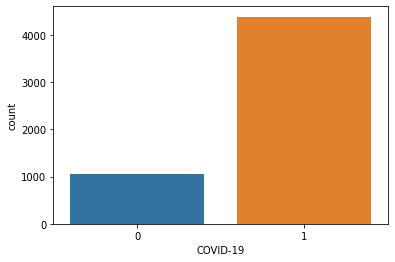

In [61]:
sns.countplot(covid_dataset['COVID-19'])

From the above graph we can clearly see that dataset is based towards Covid-Positive

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9c35cccb50>,
      dtype=object)

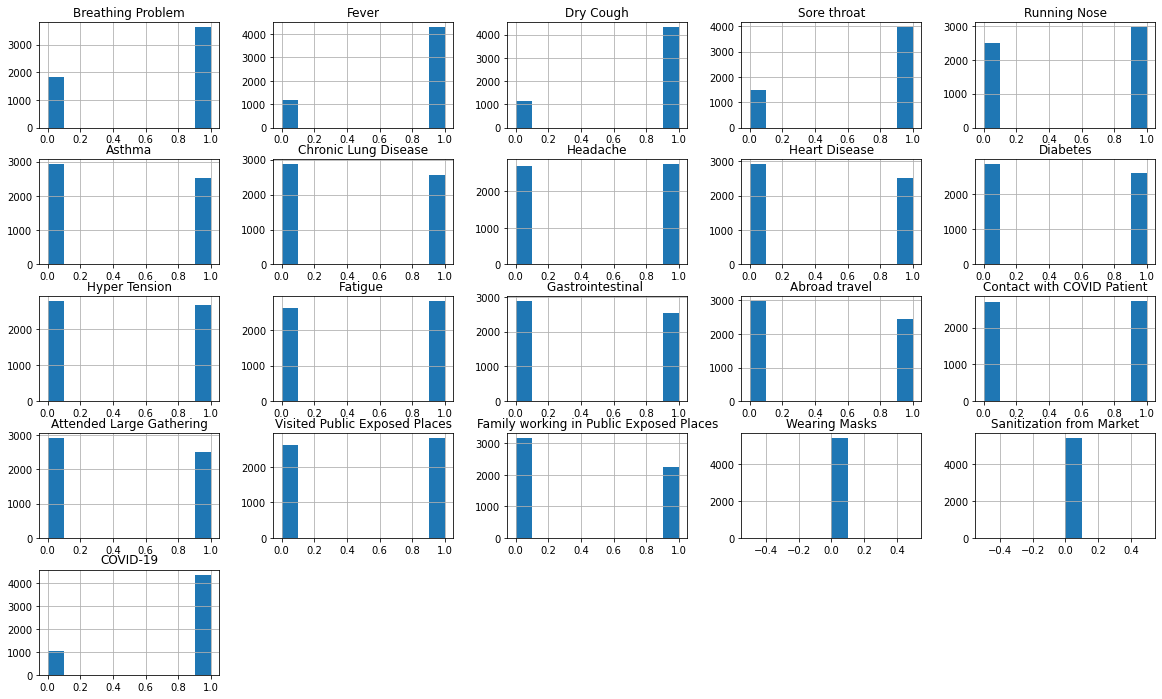

In [62]:
covid_dataset.hist(figsize = (20, 12))

####Feature Selection-
Form the above analysis we will delete-
1. Wearing Masks
2. Sanitizers Form Market
3. Fatigue
4. Running Nose
5. Asthama
6. Headache
7. Heart Disease
8. Gastrointestinal
9. Chronic Liung Disease
10. Diabetes

These colums are deleted because of low dependency on them on covid result as seen in the co-relation table and heatmap

In [63]:
removed = ['Running Nose', 'Chronic Lung Disease', 'Headache', 'Heart Disease', 'Diabetes', 'Wearing Masks', 'Sanitization from Market', 'Fatigue ', 'Gastrointestinal ', 'Asthma']
covid_dataset = covid_dataset.drop(removed, axis = 1)
covid_dataset.columns


Index(['Breathing Problem', 'Fever', 'Dry Cough', 'Sore throat',
       'Hyper Tension', 'Abroad travel', 'Contact with COVID Patient',
       'Attended Large Gathering', 'Visited Public Exposed Places',
       'Family working in Public Exposed Places', 'COVID-19'],
      dtype='object')

#### Model Selection
Using Extreme Gradient Boosting Model

In [64]:
y = covid_dataset['COVID-19']
X = covid_dataset.drop(['COVID-19'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 7)
X.head()

,Breathing Problem,Fever,Dry Cough,Sore throat,Hyper Tension,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places
0,1,1,1,1,1,0,1,0,1,1
1,1,1,1,1,0,0,0,1,1,0
2,1,1,1,1,0,1,0,0,0,0
3,1,1,1,0,0,1,0,1,1,0
4,1,1,1,1,1,0,1,0,1,0


In [65]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: COVID-19, dtype: int64

In [66]:
model = xgboost.XGBClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

####Evaluation
Confusion Matrix

Text(33.0, 0.5, 'Actual')

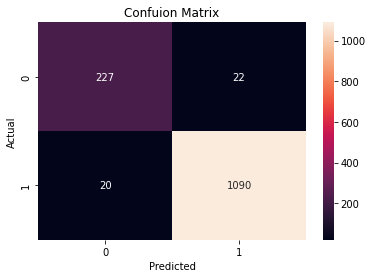

In [67]:
cnf_mtx = confusion_matrix(y_test, predictions)
plot = sns.heatmap(pd.DataFrame(cnf_mtx), annot = True, fmt = 'g')
plt.title('Confuion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')


In [68]:
acc = accuracy_score(y_test, predictions)
recall = recall_score(y_test, predictions)
precision = precision_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
roc_auc = roc_auc_score(y_test, predictions)


In [69]:
print('Accuracy is: ', acc)
print('Recall is: ', recall)
print('Precision is: ', precision)
print('F1 Score is: ', f1)
print('Roc Score is: ', roc_auc)

Accuracy is:  0.9690949227373068
Recall is:  0.9819819819819819
Precision is:  0.9802158273381295
F1 Score is:  0.981098109810981
Roc Score is:  0.9468142841636817


Saving the Model

In [70]:
final_model = xgboost.XGBClassifier()
final_model.fit(X, y)
pickle.dump(final_model, open('covid_model.sav', 'wb'))